In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn import metrics


%matplotlib inline

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df['SalePrice'].describe()
mean = train_df['SalePrice'].mean()

<AxesSubplot:xlabel='SalePrice'>

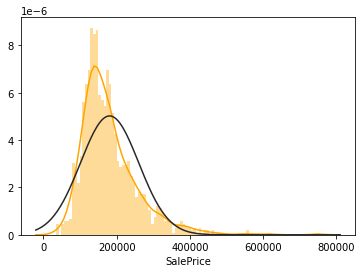

In [4]:
sns.distplot(train_df['SalePrice'], fit = norm, color='orange', bins=100, hist_kws={'alpha': 0.4})

<AxesSubplot:>

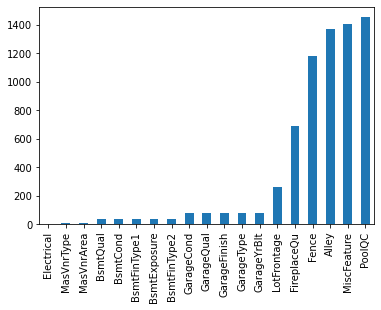

In [5]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
replace_na_none_list = ['PoolQC', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual'] 
for feature in replace_na_none_list:
    train_df[feature] = train_df[feature].fillna("None")

In [7]:
## replace na with average 
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
# MasVnrArea
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean())

<AxesSubplot:>

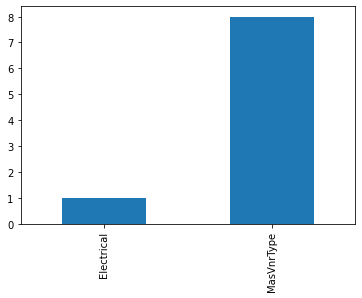

In [8]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
train_df['KitchenQual'] = train_df['KitchenQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [10]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'None': 0})

In [11]:
train_df['PoolQC'] = train_df['PoolQC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'None': 0})

In [13]:
# Bedroom, FullBath, HalfBath, LotArea, YearBuilt, GarageCars, BldgType, Foundation, CentralAir, GrLivArea, fireplace, 
features = ['SalePrice', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'LotArea', 'YearBuilt', 'GarageArea', 'GrLivArea', 'Fireplaces'   ]
dummy = ['BldgType', "Foundation", "CentralAir"]

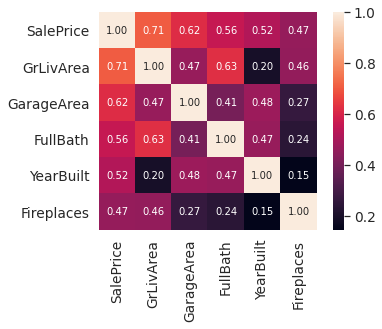

In [21]:
corrmat = train_df[features].corr()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
top_features = list(cols.values)

In [33]:
top_features.drop(['SalePrice', axis = 1 ])

SyntaxError: invalid syntax (<ipython-input-33-867c5de79888>, line 1)

In [39]:
X = train_df[top_features].drop(['SalePrice'], axis=1).values

In [40]:
y = train_df['SalePrice'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 5)
(292, 5)
(1168,)
(292,)


In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [44]:
#To retrieve the intercept:
print(regressor.intercept_)

-1554954.7914375486


In [45]:
coeff_parameter = pd.DataFrame(regressor.coef_,train_df[top_features].drop(['SalePrice'], axis=1).columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
GrLivArea,77.328477
GarageArea,86.831901
FullBath,-3423.099136
YearBuilt,797.691243
Fireplaces,16965.566395


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,200624,266296.567527
1,133000,166735.938673
2,110000,137676.587402
3,192000,232408.455711
4,88000,121237.868803
...,...,...
287,324000,239351.031641
288,555000,317988.199572
289,136000,197628.422988
290,82500,43891.682995


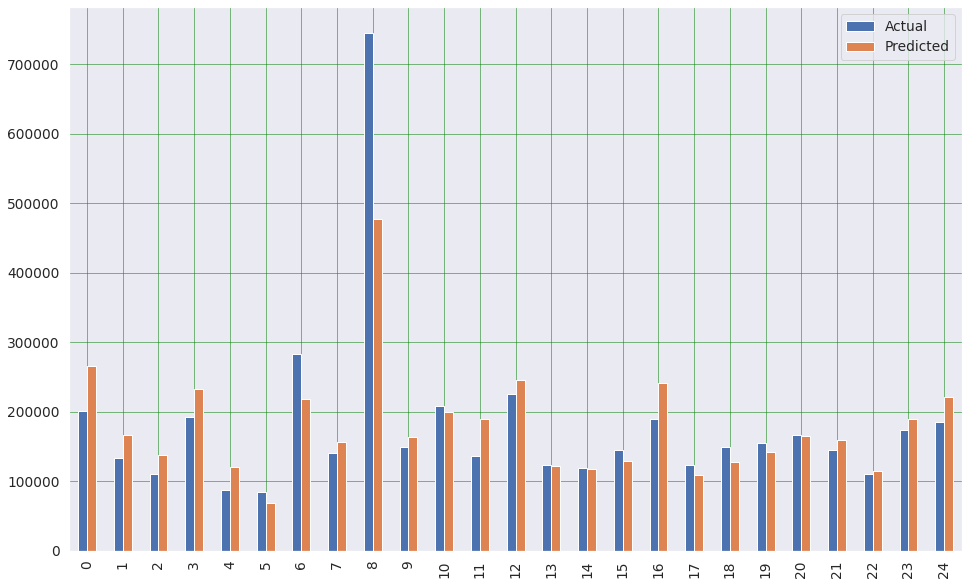

In [48]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31355.33999814009
Mean Squared Error: 2768548396.7458863
Root Mean Squared Error: 52616.997222816564


In [50]:
mean

180921.19589041095

In [51]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / mean 
## 1 0.28036760703424696
## 5 0.2531310160924366
## 10 0.27246480237615506
## 15 0.27210184481333494

0.29082826345393026

<AxesSubplot:>

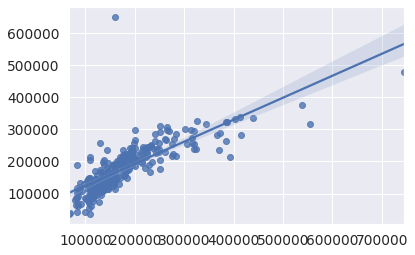

In [55]:
sns.regplot(y_test,y_pred)

In [56]:
y_pred = regressor.predict(X_test)


In [57]:
import pickle

In [58]:
with open('house_trained_model_zillow.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [59]:
import pickle
filename = 'house_trained_model_zillow.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [60]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5991009924662682


In [61]:
X_test.shape

(292, 5)